In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df

,서울,관용,자가용,영업용,계,말소,실제대수
0,2010-01-01,10521,2729799,215977,2956297,8069,2948228
1,2010-02-01,10567,2734111,216815,2961493,6948,2954545
2,2010-03-01,10625,2736078,217805,2964508,8607,2955901
3,2010-04-01,10735,2739234,218088,2968057,7769,2960288
4,2010-05-01,10696,2734013,218591,2963300,7773,2955527
...,...,...,...,...,...,...,...
133,2021-02-01,"12,691","2,942,790","202,621","3,158,102",7489,3150613
134,2021-03-01,"12,610","2,943,678","202,422","3,158,710",10159,3148551
135,2021-04-01,"12,421","2,944,563","202,091","3,159,075",8827,3150248
136,2021-05-01,"12,426","2,946,076","202,127","3,160,629",7844,3152785


In [3]:
df['year']=df['서울'].str.split('-',expand=True)[0]
df

In [6]:
df['ds']=df['서울']
df['y']=df['실제대수']
df

,서울,관용,자가용,영업용,계,말소,실제대수,year,ds,y
0,2010-01-01,10521,2729799,215977,2956297,8069,2948228,2010,2010-01-01,2948228
1,2010-02-01,10567,2734111,216815,2961493,6948,2954545,2010,2010-02-01,2954545
2,2010-03-01,10625,2736078,217805,2964508,8607,2955901,2010,2010-03-01,2955901
3,2010-04-01,10735,2739234,218088,2968057,7769,2960288,2010,2010-04-01,2960288
4,2010-05-01,10696,2734013,218591,2963300,7773,2955527,2010,2010-05-01,2955527
...,...,...,...,...,...,...,...,...,...,...
133,2021-02-01,"12,691","2,942,790","202,621","3,158,102",7489,3150613,2021,2021-02-01,3150613
134,2021-03-01,"12,610","2,943,678","202,422","3,158,710",10159,3148551,2021,2021-03-01,3148551
135,2021-04-01,"12,421","2,944,563","202,091","3,159,075",8827,3150248,2021,2021-04-01,3150248
136,2021-05-01,"12,426","2,946,076","202,127","3,160,629",7844,3152785,2021,2021-05-01,3152785


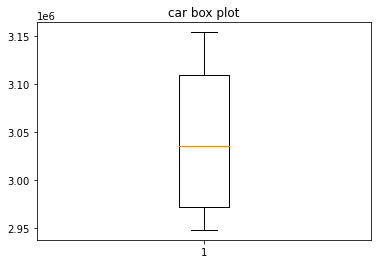

In [13]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df['실제대수'], flierprops=green_diamond)
plt.title("car box plot")
plt.show()


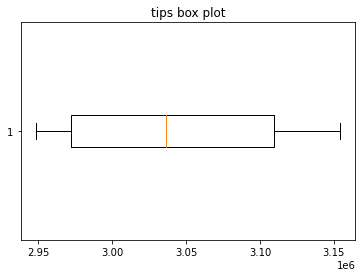

In [16]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(df['실제대수'], vert=False, flierprops=green_diamond)
plt.title("tips box plot")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


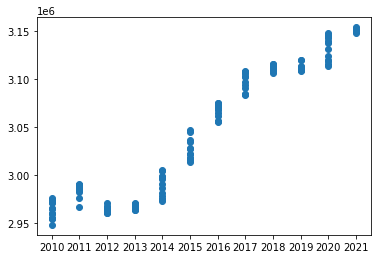

In [17]:
X = df["year"]
y = df["y"]
plt.plot(X, y, 'o')
plt.show()

In [18]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [22]:
line_fitter.predict([[2022]])

array([3173125.02124629])

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


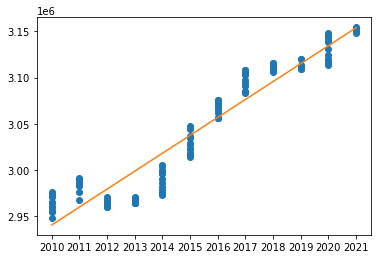

In [20]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()